# Employment DATA EDA

This file aims to show the logic behind cleaning employment data.

First, let's load some libraries

In [1]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load data frame

In [30]:
df = pd.read_excel('data/employment/GSS.xls',index_col=1)

In [31]:
df.head()

,Gss year for this respondent,Labor force status,Number of hours worked last week,Marital status,Respondents sex,Household members less than 6 yrs old,Household members 6 thru 12 yrs old,Household members 13 thru 17 yrs old,Household members 18 yrs and older,General happiness
Respondent id number,,,,,,,,,,
2,1994,Working fulltime,40,Married,Male,0,0,0,2,Very happy
5,1994,Working parttime,20,Never married,Female,0,1,1,3,Not too happy
11,1994,Working fulltime,40,Never married,Female,0,0,0,1,Pretty happy
13,1994,Working fulltime,35,Married,Male,0,0,0,1,Very happy
19,1994,Retired,Not applicable,Never married,Male,0,0,0,1,Not too happy


column names are long. use extract_variables function to extract variables. Then replace the columns names replece function.  **Need to incorprate this into data process class function**

In [32]:
variables = extract_variables('data/employment/GSS.sps')
replace_variables(df,variables)

In [33]:
df.head(1)

,year,wrkstat,hrs1,marital,sex,babies,preteen,teens,adults,happy
Respondent id number,,,,,,,,,,
2,1994,Working fulltime,40,Married,Male,0,0,0,2,Very happy


## EDA

In [7]:
df.shape

(30213, 10)

In [11]:
df.

<class 'pandas.core.frame.DataFrame'>
Index: 30213 entries, 1 to Data collection: General Social Survey
Case Selection: (Combined.year >= 1994 AND Combined.year <= 2014)
Data columns (total 10 columns):
year       30212 non-null object
wrkstat    30211 non-null object
hrs2       30211 non-null object
marital    30211 non-null object
sex        30211 non-null object
babies     30211 non-null object
preteen    30211 non-null object
teens      30211 non-null object
adults     30211 non-null object
happy      30211 non-null object
dtypes: object(10)
memory usage: 2.5+ MB


In [16]:
df.wrkstat.value_counts(dropna=False)

Working fulltime    15606
Retired              4652
Keeping house        3302
Working parttime     3212
Unempl, laid off     1069
School                961
Other                 783
Temp not working      612
No answer              14
NaN                     2
Name: wrkstat, dtype: int64

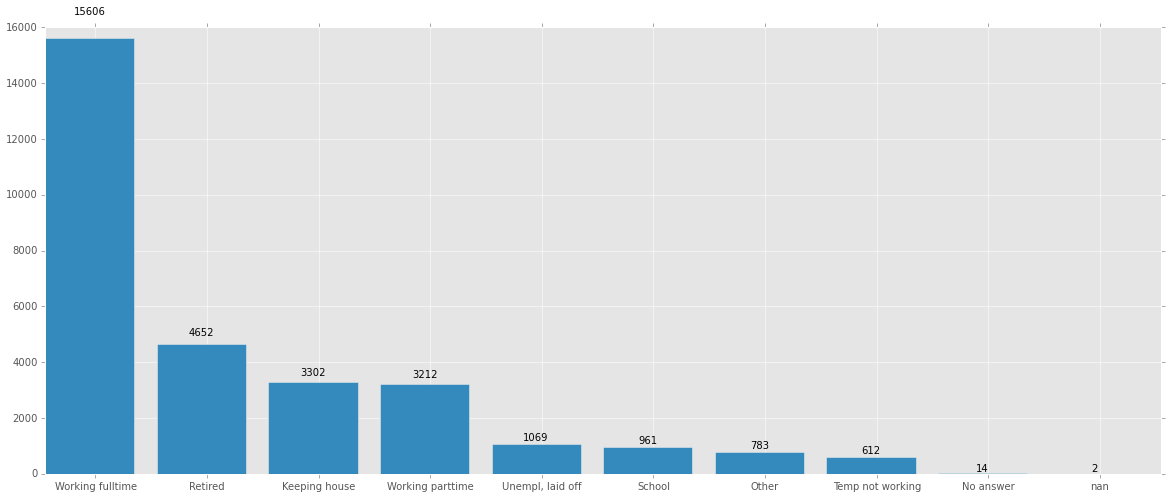

In [42]:
simple_bar(df.wrkstat,(20,8))

### Retired population are not group of interest for this study. Drop the retired rows.

In [20]:
df2 = pd.read_excel('data/employment_1/GSS.xls',index_col=1)

In [21]:
variables = extract_variables('data/employment_1/GSS.sps')
replace_variables(df2,variables)

In [38]:
sum(df.index != df2.index), df.shape[0]

/home/yihua/anaconda/lib/python2.7/site-packages/pandas/core/index.py:2767: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  result = func(np.asarray(other))


(15981, 30213)

In [41]:
df2.shape[0]== df.shape[0]

True

In [47]:
set(df.index) == set(df2.index)

False

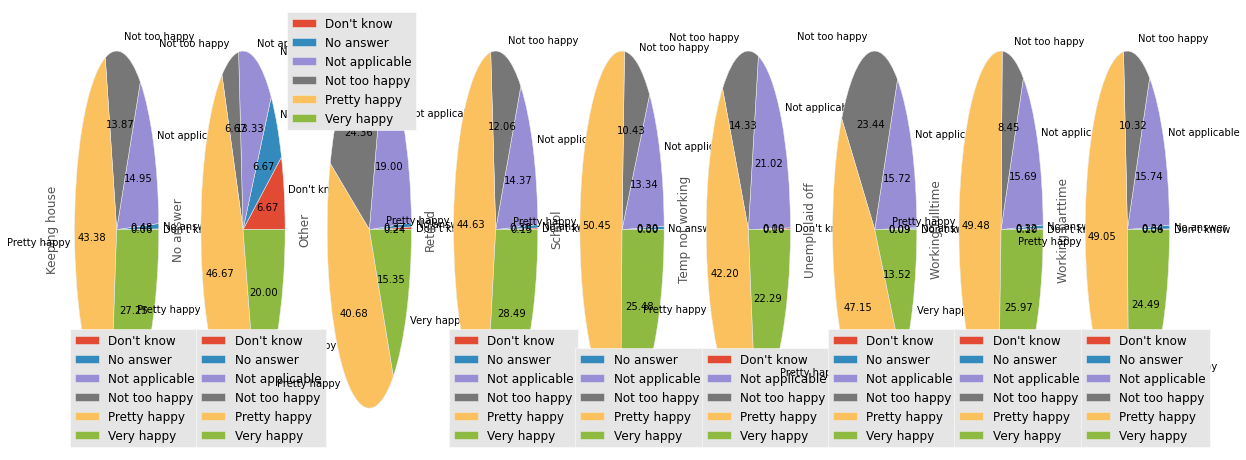

In [75]:
pie_chart(df.wrkstat,df.happy)

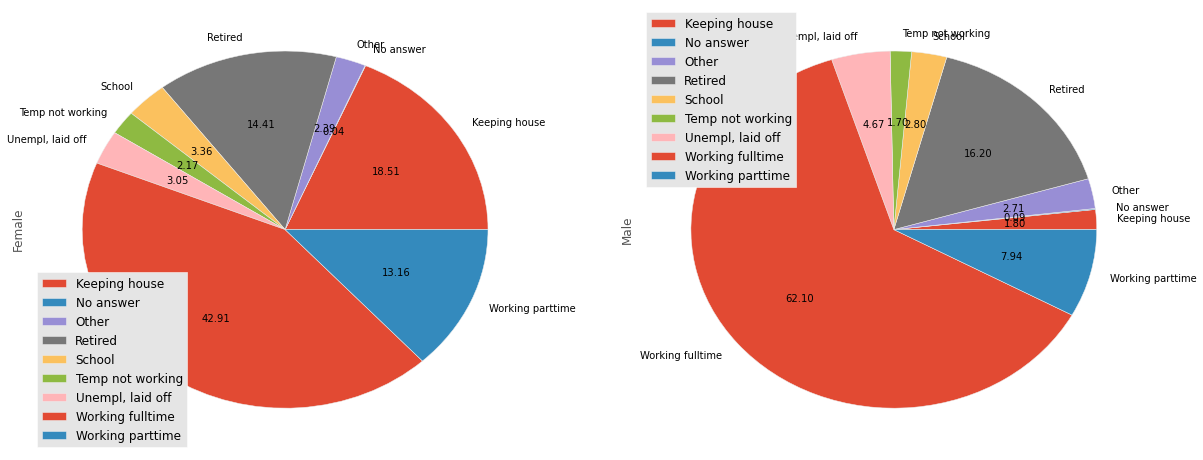

In [74]:
pie_chart(df2.sex,df2.wrkstat)

In [73]:
df2.sort_index()

,year,wrkstat,hrs1,hrs2,marital,sex,babies,preteen,teens,adults,happy
Respondent id number,,,,,,,,,,,
1,2014,Working fulltime,60,Not applicable,Divorced,Male,0,0,0,1,Very happy
1,1994,Keeping house,Not applicable,Not applicable,Divorced,Female,2,3,0,1,Pretty happy
1,2000,Working fulltime,40,Not applicable,Never married,Male,0,0,0,2,Pretty happy
1,2000,Working fulltime,40,Not applicable,Never married,Male,0,0,0,2,Pretty happy
1,2002,Working fulltime,40,Not applicable,Divorced,Female,0,0,0,1,Pretty happy
1,2006,Working fulltime,35,Not applicable,Never married,Female,0,0,2,1,Pretty happy
1,2012,Working parttime,15,Not applicable,Never married,Male,0,0,0,3,Very happy
1,2004,Keeping house,Not applicable,Not applicable,Married,Female,0,0,0,2,Not applicable
1,1998,Working fulltime,40,Not applicable,Divorced,Male,0,0,0,1,Pretty happy
